In [3]:
%matplotlib inline

In [10]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import silhouette_score

In [12]:
df = pd.read_csv("ACMETelephoneABT.csv")

In [29]:
df2 = df.iloc[:,7:31]

In [30]:
df2.drop(df2.columns[[4,5,6]],axis = 1, inplace = True)

In [31]:
df2.head(5)

,numHandsets,handsetAge,smartPhone,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,...,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted
0,1,1812,false,0.00,38.00,7.50,38.00,0.00,0.00,-0.030,...,0.41,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,0,0
1,4,544,true,79.99,35.30,24.25,34.98,0.00,0.00,0.395,...,2.39,4.00,1.67,5.586826,7.499560,0.00,53,0.00,0,0
2,2,138,true,29.99,21.15,45.50,16.99,14.00,0.00,-0.310,...,2.28,0.00,0.33,0.500000,-5.940493,4.33,58,0.00,0,0
3,3,122,true,9.99,91.18,332.75,75.00,0.00,0.00,-0.615,...,33.21,9.00,4.67,8.629661,-0.066485,5.33,50,0.33,0,0
4,8,10,true,129.99,93.02,1348.25,75.00,4.75,1.92,-3.305,...,436.53,59.33,23.00,14.042685,-7.208502,14.67,56,0.00,0,0


In [32]:
df2.describe()

,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.804500,390.171700,35.730696,58.927600,521.170645,46.236537,42.392670,1.186048,-0.280848,-0.003595,115.266619,25.208834,8.368029,2.217785,-0.046749,9.992283,18.836300,1.737414,0.044600,0.020700
std,1.345088,257.076656,57.072922,43.889815,540.435285,23.964960,106.374374,6.048811,5.231031,0.762955,169.979443,35.665714,17.676847,3.882714,9.973846,14.859162,9.610928,5.754564,0.225867,0.155158
min,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.355000,-7.600400,0.000000,0.000000,0.000000,0.000000,-41.322736,0.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,210.000000,0.000000,33.327500,150.627500,30.000000,0.000000,0.000000,-1.725000,-0.132600,7.690000,3.000000,0.000000,0.779357,-6.791049,1.670000,11.000000,0.000000,0.000000,0.000000
50%,1.000000,339.000000,0.000000,49.205000,359.625000,44.990000,3.000000,0.000000,-0.100000,-0.005200,52.540000,13.330000,2.000000,1.399874,0.011607,5.330000,17.000000,0.000000,0.000000,0.000000
75%,2.000000,525.000000,59.990000,71.762500,709.187500,59.990000,43.750000,0.260000,1.300000,0.042600,154.382500,33.330000,9.000000,2.494232,6.494723,12.670000,24.000000,1.330000,0.000000,0.000000
max,21.000000,1812.000000,499.990000,584.230000,6336.250000,337.980000,4320.750000,177.990000,50.425000,17.911400,2006.290000,610.330000,304.000000,160.000000,37.779743,304.670000,61.000000,365.670000,4.000000,4.000000


In [33]:
#Store all numerical columns
numericalcolumn = df.select_dtypes(include = [np.number]).columns

In [34]:
df_z = df[numericalcolumn].apply(zscore)

In [36]:
df_z.head(5)

,customer,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
0,-1.735244,-0.194895,0.543484,-0.598132,5.531033,-0.626085,-0.476845,-0.950523,-0.343708,-0.398543,...,-0.697591,-0.473413,-0.477882,-0.630081,-0.672500,4.283224,-0.301934,-0.197471,-0.133419,-0.304103
1,-1.734966,0.256418,1.498975,1.632317,0.598405,0.775526,-0.538366,-0.919528,-0.469732,-0.398543,...,-0.594686,-0.378934,0.867746,0.756648,-0.672500,3.554850,-0.301934,-0.197471,-0.133419,-0.304103
2,-1.734202,1.971408,0.861981,0.145351,-0.980969,-0.100590,-0.860780,-0.880206,-1.220448,-0.266926,...,-0.706844,-0.454743,-0.442441,-0.590949,-0.381082,4.075117,-0.301934,-0.197471,-0.133419,4.374410
3,-1.733195,-0.014370,0.543484,0.888834,-1.043211,-0.451037,0.734886,-0.348664,1.200290,-0.398543,...,-0.454488,-0.209212,1.651473,-0.001979,-0.313781,3.242690,-0.244586,-0.197471,-0.133419,-0.304103
4,-1.732431,0.075893,0.861981,4.606250,-1.478900,1.651642,0.776811,1.530471,1.200290,-0.353887,...,0.956742,0.827789,3.045676,-0.718089,0.314819,3.867010,-0.301934,-0.197471,-0.133419,-0.304103


In [44]:
cluster_range = range(1,15)
cluster_errors = []
for non_clusters in cluster_range:
    clusters = KMeans(non_clusters, n_init = 5)
    clusters.fit(df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,cluster_errors,num_clusters
0,240000.000000,1
1,208234.245183,2
2,193999.455183,3
3,180979.954330,4
4,172342.334346,5
5,165165.748637,6
6,158920.792157,7
7,153717.544417,8
8,147912.032368,9
9,142385.550716,10


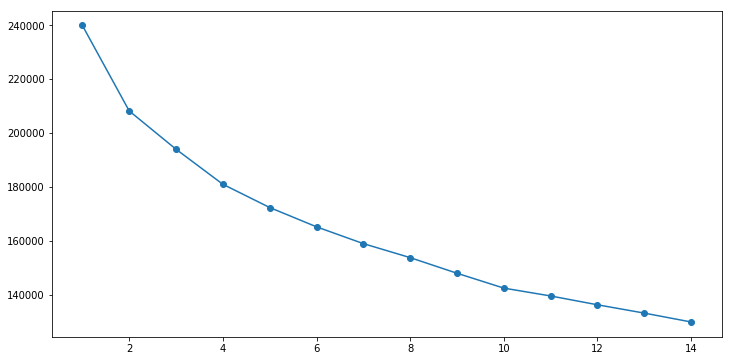

In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [75]:
kmeans = KMeans(n_clusters=5, n_init = 5, random_state=2345)

In [76]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [77]:
predictions = kmeans.predict(df_z)
df["group"] = predictions
df.head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,group
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.362398,-6.330770,0.00,60,0.00,0,0,0,false,1
1,1000012,36,,,yes,true,9,4,544,true,...,5.586826,7.499560,0.00,53,0.00,0,0,0,false,1
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.500000,-5.940493,4.33,58,0.00,0,0,3,false,0
3,1000063,30,,suburban,no,false,6,3,122,true,...,8.629661,-0.066485,5.33,50,0.33,0,0,0,false,1
4,1000085,32,,town,yes,false,7,8,10,true,...,14.042685,-7.208502,14.67,56,0.00,0,0,0,false,3


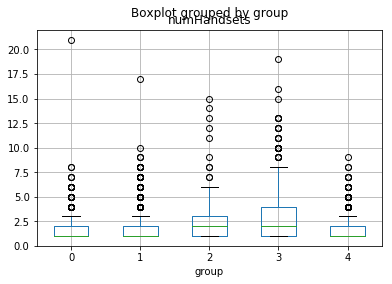

In [78]:
df.boxplot(column = "numHandsets", by = "group")

In [ ]:
#by age
df.boxplot(column = )
#handset price

In [68]:
df.columns

Index([u'customer', u' age', u' occupation', u' regionType', u'marriageStatus',
       u' children', u' income', u'numHandsets', u'handsetAge', u'smartPhone',
       u'currentHandsetPrice', u' creditRating', u'homeOwner', u' creditCard',
       u'avgBill', u'avgMins', u'avgrecurringCharge', u'avgOverBundleMins',
       u'avgRoamCalls', u'callMinutesChangePct', u'billAmountChangePct',
       u'avgReceivedMins', u'avgOutCalls', u'avgInCalls', u'peakOffPeakRatio',
       u'peakOffPeakRatioChangePct', u'avgDroppedCalls', u'lifeTime',
       u'lastMonthCustomerCareCalls', u'numRetentionCalls',
       u'numRetentionOffersAccepted', u'newFrequentNumbers', u'churn',
       u'group'],
      dtype='object')